# Predictive Analysis using Machine Learning
We aim to predict the Min, Max and Modal prices of a given commodity based on the various features provided in the dataset like Arrivals, Grade, Variety, Year, Month and Date. 

## Importing Libraries

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# sklearn regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

import pickle
import os
import json

## Load Preprocessed Data

In [15]:
# load data
def load_processed_data(commodity):
    df = pd.read_csv(f'processed_data/{commodity.upper()}/processed_krama_report.csv')
    return df

rice_df = load_processed_data('rice')
rice_df.tail()

,Min,Max,Modal,Year,Month,Day,DayOfWeek,Variety_BASUMATHI,Variety_BROKEN RICE,Variety_COARSE,Variety_CR 1009 (COARSE) BOILED,Variety_DAPPA,Variety_FINE,Variety_MEDIUM,Variety_SONA MANSOORI NON BASMATI,Grade_AVERAGE,Market_BENGALURU,Market_BIDAR,Market_MYSURU,Market_SHIVAMOGGA
5758,2800.0,4500.0,3650.0,2023.0,12.0,26.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
5759,2800.0,4500.0,3700.0,2023.0,12.0,27.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
5760,2800.0,4500.0,3700.0,2023.0,12.0,28.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
5761,2800.0,4500.0,3700.0,2023.0,12.0,29.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
5762,2800.0,4500.0,3700.0,2023.0,12.0,30.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [16]:
rice_df.shape

(5763, 20)

## Test-Train Split

In [17]:
# Test-training split
X = rice_df.drop(['Min', 'Max', 'Modal'], axis=1)
Y = rice_df[['Min', 'Max', 'Modal']]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4610, 17), (1153, 17), (4610, 3), (1153, 3))

## Model Building

Training Linear Regression...
Training Random Forest...
Training Support Vector Machine...
Training K-Nearest Neighbors...
Linear Regression - Min MSE: 760280.5027741313, Max MSE: 1015299.7948991804, Modal MSE: 231821.98629571285
Linear Regression - Average MSE: 669134.0946563415
Random Forest - Min MSE: 729295.1784603643, Max MSE: 888059.7783042497, Modal MSE: 121466.75636149176
Random Forest - Average MSE: 579607.237708702
Support Vector Machine - Min MSE: 1776545.9526240004, Max MSE: 2736420.426422877, Modal MSE: 1677420.4758882183
Support Vector Machine - Average MSE: 2063462.2849783648
K-Nearest Neighbors - Min MSE: 937950.804822203, Max MSE: 1774969.7855680834, Modal MSE: 713559.621647875
K-Nearest Neighbors - Average MSE: 1142160.070679387


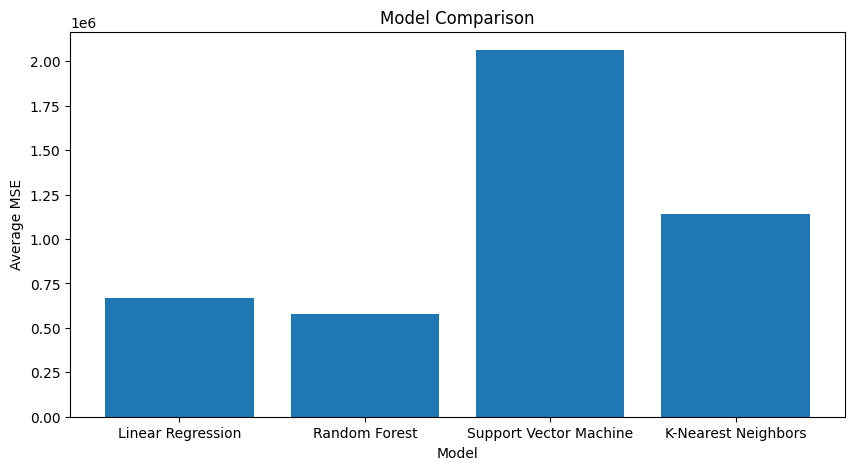

In [18]:
# Model Training
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR(),
    # 'Decision Tree': DecisionTreeRegressor(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    # 'Gradient Boosting': GradientBoostingRegressor()
}

# We have to predict 3 values, so we will train 3 models for each algorithm
min_models = {}
max_models = {}
modal_models = {}

for name, model in models.items():
    print(f'Training {name}...')
    model.fit(x_train, y_train['Min'])
    min_models[name] = model

    model.fit(x_train, y_train['Max'])
    max_models[name] = model

    model.fit(x_train, y_train['Modal'])
    modal_models[name] = model

average_mse_scores = {}

# Model Evaluation
for name in models:
    min_model = min_models[name]
    max_model = max_models[name]
    modal_model = modal_models[name]

    min_pred = min_model.predict(x_test)
    max_pred = max_model.predict(x_test)
    modal_pred = modal_model.predict(x_test)

    min_mse = mean_squared_error(y_test['Min'], min_pred)
    max_mse = mean_squared_error(y_test['Max'], max_pred)
    modal_mse = mean_squared_error(y_test['Modal'], modal_pred)
    # min_r2 = r2_score(y_test['Min'], min_pred)
    # max_r2 = r2_score(y_test['Max'], max_pred)
    # modal_r2 = r2_score(y_test['Modal'], modal_pred)
    # min_cv_score = cross_val_score(min_model, x_train, y_train['Min'], cv=5).mean()
    # max_cv_score = cross_val_score(max_model, x_train, y_train['Max'], cv=5).mean()
    # modal_cv_score = cross_val_score(modal_model, x_train, y_train['Modal'], cv=5).mean()

    average_mse = (min_mse + max_mse + modal_mse) / 3
    average_mse_scores[name] = average_mse
    
    print(f'{name} - Min MSE: {min_mse}, Max MSE: {max_mse}, Modal MSE: {modal_mse}')
    # print(f'{name} - Min R2: {min_r2}, Max R2: {max_r2}, Modal R2: {modal_r2}')
    # print(f'{name} - Min CV Score: {min_cv_score}, Max CV Score: {max_cv_score}, Modal CV Score: {modal_cv_score}')
    print(f'{name} - Average MSE: {average_mse}')

# Model Comparison
plt.figure(figsize=(10, 5))
plt.bar(average_mse_scores.keys(), average_mse_scores.values())
plt.xlabel('Model')
plt.ylabel('Average MSE')
plt.title('Model Comparison')
plt.show()


We can observe that the RandomForestRegressor model is performing the best among the four models. We will now use hyperparameter tuning to improve the performance of the model.

## Hyperparameter Tuning

In [19]:
# Hyperparameter Tuning of Random Forest Models

rf_hyper_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
}

# Random Forest Modal Model
rf_modal_model = RandomForestRegressor()
rf_modal_params = rf_hyper_params
rf_modal_grid = GridSearchCV(rf_modal_model, rf_modal_params, cv=3, verbose=3)
rf_modal_grid.fit(x_train, y_train['Modal'])
print(f'Best Parameters for Random Forest Modal Model: {rf_modal_grid.best_params_}')

best_params = rf_modal_grid.best_params_

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END ..max_depth=None, n_estimators=100;, score=0.922 total time=   0.5s
[CV 2/3] END ..max_depth=None, n_estimators=100;, score=0.908 total time=   0.5s
[CV 3/3] END ..max_depth=None, n_estimators=100;, score=0.903 total time=   0.5s
[CV 1/3] END ..max_depth=None, n_estimators=200;, score=0.925 total time=   1.1s
[CV 2/3] END ..max_depth=None, n_estimators=200;, score=0.906 total time=   1.1s
[CV 3/3] END ..max_depth=None, n_estimators=200;, score=0.903 total time=   1.0s
[CV 1/3] END ....max_depth=10, n_estimators=100;, score=0.921 total time=   0.3s
[CV 2/3] END ....max_depth=10, n_estimators=100;, score=0.908 total time=   0.3s
[CV 3/3] END ....max_depth=10, n_estimators=100;, score=0.901 total time=   0.3s
[CV 1/3] END ....max_depth=10, n_estimators=200;, score=0.924 total time=   0.7s
[CV 2/3] END ....max_depth=10, n_estimators=200;, score=0.909 total time=   0.8s
[CV 3/3] END ....max_depth=10, n_estimators=200;,

In [20]:
# Retraining the model with best parameters

rf_modal_model = RandomForestRegressor(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'])
rf_min_model = RandomForestRegressor(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'])
rf_max_model = RandomForestRegressor(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'])
rf_modal_model.fit(x_train, y_train['Modal'])
rf_min_model.fit(x_train, y_train['Min'])
rf_max_model.fit(x_train, y_train['Max'])

RandomForestRegressor(max_depth=10, n_estimators=200)

In [21]:
# Linear Regression Model Hyper Parameter Tuning

lr_hyper_params = {
    'fit_intercept': [True, False],
}

# Linear Regression Modal Model
lr_modal_model = LinearRegression()
lr_modal_params = lr_hyper_params
lr_modal_grid = GridSearchCV(lr_modal_model, lr_modal_params, cv=3, verbose=3)
lr_modal_grid.fit(x_train, y_train['Modal'])
print(f'Best Parameters for Linear Regression Modal Model: {lr_modal_grid.best_params_}')

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV 1/3] END ................fit_intercept=True;, score=0.864 total time=   0.0s
[CV 2/3] END ................fit_intercept=True;, score=0.850 total time=   0.0s
[CV 3/3] END ................fit_intercept=True;, score=0.845 total time=   0.0s
[CV 1/3] END ...............fit_intercept=False;, score=0.864 total time=   0.0s
[CV 2/3] END ...............fit_intercept=False;, score=0.850 total time=   0.0s
[CV 3/3] END ...............fit_intercept=False;, score=0.845 total time=   0.0s
Best Parameters for Linear Regression Modal Model: {'fit_intercept': False}


In [22]:
# Retraining the model with best parameters

lr_modal_model = LinearRegression(fit_intercept=lr_modal_grid.best_params_['fit_intercept'])
lr_min_model = LinearRegression(fit_intercept=lr_modal_grid.best_params_['fit_intercept'])
lr_max_model = LinearRegression(fit_intercept=lr_modal_grid.best_params_['fit_intercept'])
lr_modal_model.fit(x_train, y_train['Modal'])
lr_min_model.fit(x_train, y_train['Min'])
lr_max_model.fit(x_train, y_train['Max'])

LinearRegression(fit_intercept=False)

## Best Model

Random Forest - Min MSE: 128071.72082611745, Max MSE: 159316.15728991068, Modal MSE: 125210.22643280799
Random Forest - Average MSE: 137532.7015162787
Linear Regression - Min MSE: 201404.28150230207, Max MSE: 291934.01412902743, Modal MSE: 231821.9862956984
Linear Regression - Average MSE: 241720.093975676


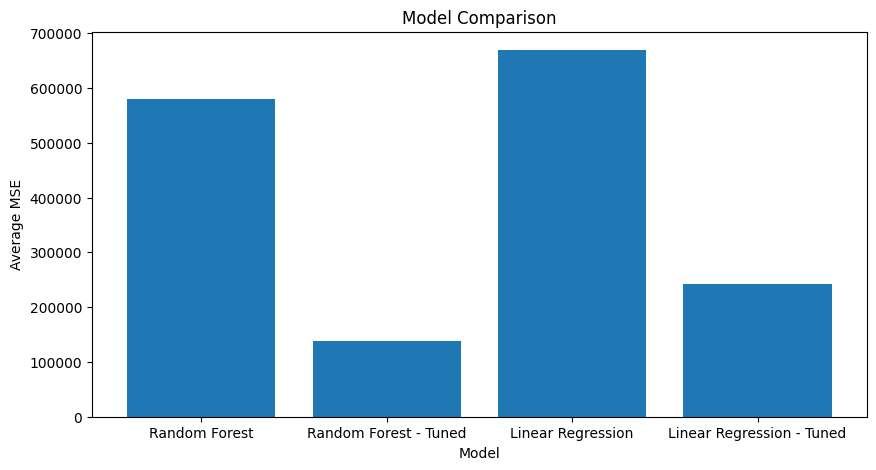

In [23]:
# Comparing the models

# Random Forest
rf_min_pred = rf_min_model.predict(x_test)
rf_max_pred = rf_max_model.predict(x_test)
rf_modal_pred = rf_modal_model.predict(x_test)

rf_min_mse = mean_squared_error(y_test['Min'], rf_min_pred)
rf_max_mse = mean_squared_error(y_test['Max'], rf_max_pred)
rf_modal_mse = mean_squared_error(y_test['Modal'], rf_modal_pred)

rf_average_mse = (rf_min_mse + rf_max_mse + rf_modal_mse) / 3

print(f'Random Forest - Min MSE: {rf_min_mse}, Max MSE: {rf_max_mse}, Modal MSE: {rf_modal_mse}')
print(f'Random Forest - Average MSE: {rf_average_mse}')

# Linear Regression
lr_min_pred = lr_min_model.predict(x_test)
lr_max_pred = lr_max_model.predict(x_test)
lr_modal_pred = lr_modal_model.predict(x_test)

lr_min_mse = mean_squared_error(y_test['Min'], lr_min_pred)
lr_max_mse = mean_squared_error(y_test['Max'], lr_max_pred)
lr_modal_mse = mean_squared_error(y_test['Modal'], lr_modal_pred)

lr_average_mse = (lr_min_mse + lr_max_mse + lr_modal_mse) / 3

print(f'Linear Regression - Min MSE: {lr_min_mse}, Max MSE: {lr_max_mse}, Modal MSE: {lr_modal_mse}')
print(f'Linear Regression - Average MSE: {lr_average_mse}')


# Model Comparison
plt.figure(figsize=(10, 5))
plt.bar(['Random Forest', 'Random Forest - Tuned', 'Linear Regression', 'Linear Regression - Tuned'], [average_mse_scores['Random Forest'], rf_average_mse, average_mse_scores['Linear Regression'], lr_average_mse])
plt.xlabel('Model')
plt.ylabel('Average MSE')
plt.title('Model Comparison')
plt.show()

We can see that there isn't much improvement in the performance of the model after hyperparameter tuning. We will now save the best model to make predictions on the test data.

## Testing on Unknown Data
Now we will evaluate as per the Karnataka Krama Reports updated till 2024.

In [24]:
# The Actual Min, Max and Modal values for the record as per the report on 26/ 09/ 2024 are as follows:
record = {
    # 'Arrivals': 2.6930320913383152,
    # 'Min': 5800.0,
    # 'Max': 6000.0,
    # 'Modal': 5900.0,
    'Year': 2024.0,
    'Month': 9.0,
    'Day': 26.0,
    'DayOfWeek': 4.0,
    'Variety_BASUMATHI': 0.0,
    'Variety_BROKEN RICE': 0.0,
    'Variety_COARSE': 0.0,
    'Variety_CR 1009 (COARSE) BOILED': 0.0,
    'Variety_DAPPA': 0.0,
    'Variety_FINE': 0.0,
    'Variety_MEDIUM': 1.0,
    'Variety_SONA MANSOORI NON BASMATI': 0.0,
    'Grade_AVERAGE': 1.0,
    'Market_BENGALURU': 1.0,
    'Market_BIDAR': 0.0,
    'Market_MYSURU': 0.0,
    'Market_SHIVAMOGGA': 0.0
}

print("Actual Min: ", 5800.0)
print("Actual Max: ", 6000.0)
print("Actual Modal: ", 5900.0)

print("RF Min: ", rf_min_model.predict(pd.DataFrame([record]))[0])
print("RF Max: ", rf_max_model.predict(pd.DataFrame([record]))[0])
print("RF Modal: ", rf_modal_model.predict(pd.DataFrame([record]))[0])

print("LR Min: ", lr_min_model.predict(pd.DataFrame([record]))[0])
print("LR Max: ", lr_max_model.predict(pd.DataFrame([record]))[0])
print("LR Modal: ", lr_modal_model.predict(pd.DataFrame([record]))[0])

Actual Min:  5800.0
Actual Max:  6000.0
Actual Modal:  5900.0
RF Min:  5540.237260104659
RF Max:  6102.42683831871
RF Modal:  5779.98143768762
LR Min:  4795.5112226333
LR Max:  5110.084563866854
LR Modal:  4917.076785486519


## Saving the Training model for comparison with DL Models

In [25]:
import pickle

# Save the model
with open('ML_models/best_modal_model.pkl', 'wb') as f:
    pickle.dump(rf_modal_model, f)
with open('ML_models/best_min_model.pkl', 'wb') as f:
    pickle.dump(rf_min_model, f)
with open('ML_models/best_max_model.pkl', 'wb') as f:
    pickle.dump(rf_max_model, f)

## Training and Saving models for all Markets on Complete Dataset

In [26]:
# Training on complete data and saving for each commodity

def train_and_save_model(commodity):
    df = load_processed_data(commodity)
    X = df.drop(['Min', 'Max', 'Modal'], axis=1)
    Y = df[['Min', 'Max', 'Modal']]

    rf_modal_model = RandomForestRegressor(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'])
    rf_min_model = RandomForestRegressor(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'])
    rf_max_model = RandomForestRegressor(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'])
    rf_modal_model.fit(X, Y['Modal'])
    rf_min_model.fit(X, Y['Min'])
    rf_max_model.fit(X, Y['Max'])

    if not os.path.exists(f'ML_models/{commodity}'):
        os.makedirs(f'ML_models/{commodity}')

    with open(f'ML_models/{commodity}/modal_model.pkl', 'wb') as f:
        pickle.dump(rf_modal_model, f)
    with open(f'ML_models/{commodity}/min_model.pkl', 'wb') as f:
        pickle.dump(rf_min_model, f)
    with open(f'ML_models/{commodity}/max_model.pkl', 'wb') as f:
        pickle.dump(rf_max_model, f)

with open('commodities.json', 'r') as f:
    COMMODITIES = json.load(f)

COMMODITIES

{'RICE': ['BENGALURU', 'BIDAR', 'MYSURU', 'SHIVAMOGGA'],
 'WHEAT': ['BENGALURU', 'BIDAR', 'HUBBALLI', 'MYSURU', 'SHIVAMOGGA'],
 'GROUNDNUT': ['BENGALURU', 'MYSURU', 'YADGIR'],
 'GREEN PEAS': ['BENGALURU', 'MYSURU', 'SHIVAMOGGA'],
 'TUR DAL': ['BENGALURU', 'MYSURU', 'SHIVAMOGGA']}

In [27]:
# Train for each commodity

for commodity in COMMODITIES:
    print(f'Training models for {commodity}...')
    train_and_save_model(commodity)

Training models for RICE...
Training models for WHEAT...
Training models for GROUNDNUT...
Training models for GREEN PEAS...
Training models for TUR DAL...
